In [25]:
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
import pandas as pd
import re
from wordcloud import WordCloud
import contractions
import collections

subreddit = 'religion'
type_of_content = 'submissions'
column = 'title'
filename = f'{subreddit}_{type_of_content}_filtered.csv'
stop = nltk.corpus.stopwords.words('english')
tokenizer = nltk.RegexpTokenizer(r"\w+")
lemmatizer = nltk.WordNetLemmatizer()

dataframe = pd.read_csv(filename, compression='gzip')
dataframe.head()

,author,title
0,Bobsledtohell,What do you think that Heaven will be like - i...
1,Gods-Favourite-Child,Is it really fair to put down another religion...
2,mamypokong,To former preachers/missionaries who have left...
3,Globalfinancidigest,"Church leaders, what legacy are you leaving be..."
4,OnlykidsAreAtheists,Malcolm's words


In [26]:
comments = dataframe[column]
frequency = []

wordcloud_text = ' '
for comment in comments:
    comment = str(comment)
    comment = comment.lower()
    comment = re.sub(r"(@\[A-Za-z0-9]+)|(\w+:\/\/\S+)|^&gt;","",comment)
    comment = " ".join(word for word in comment.split() if word not in stop)
    comment = " ".join(contractions.fix(word) for word in comment.split())
    comment = " ".join(word for word in comment.split() if word not in stop)

    comment = re.sub(r"[^0-9A-Za-z \t]","",comment)
    comment = tokenizer.tokenize(comment)
    comment = [lemmatizer.lemmatize(word, pos="v") for word in comment]
    pos = nltk.pos_tag(comment)
    for word in pos:
        if word[1] in {'NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS'}:
            wordcloud_text = wordcloud_text + word[0] + ' '
            frequency.append(word[0])



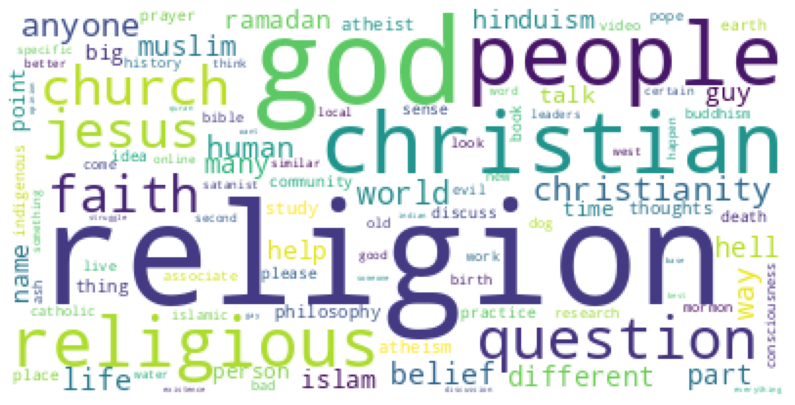

In [27]:
wc = WordCloud(max_words=100, background_color='white').generate(wordcloud_text)
plt.figure(figsize = (14, 14))
plt.axis("off")
plt.imshow(wc)
plt.savefig(f'{subreddit}_wordcloud.png')

* https://github.com/britt-allen/classifying_reddit_posts/blob/master/notebooks/project_3_data_cleaning_and_eda.ipynb
* monkeylearn.com/blog/text_cleaning


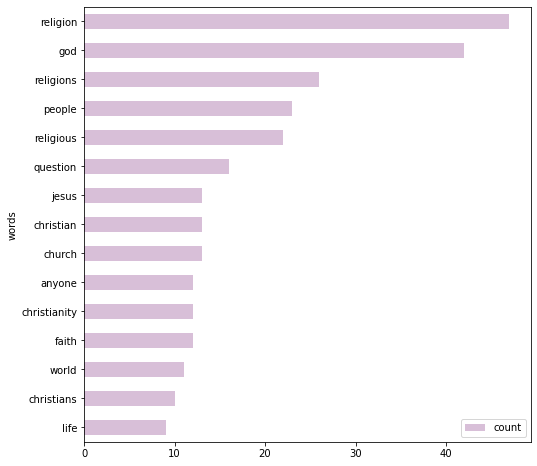

In [28]:
word_frequency = collections.Counter(frequency)
word_frequency.most_common(15)
word_frequency = pd.DataFrame(word_frequency.most_common(15), columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))
word_frequency.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="thistle")
plt.show()
